# World Bank Data
Nasdaq API dowload - .csv files

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import time


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# WB data set
WB_totaldata = Path("Resources/WB_DATA_d950d0cd269a601150c0afd03b234ee2.csv")

In [3]:
# Read data file with the Pandas library
# encoding?, i.e encoding="ISO-8859-1"
WB_totaldata_df = pd.read_csv(WB_totaldata)

In [4]:
WB_totaldata_df

,series_id,country_code,country_name,year,value
0,SH.HIV.INCD.TL,ITA,Italy,2017,3700.000000
1,SH.HIV.INCD.TL,JAM,Jamaica,2017,1500.000000
2,SH.HIV.INCD.TL,JOR,Jordan,2017,100.000000
3,SH.HIV.INCD.TL,KEN,Kenya,2017,34000.000000
4,SH.HIV.INCD.TL,KGZ,Kyrgyz Republic,2017,730.000000
...,...,...,...,...,...
9087997,IT.NET.USER.ZS,THA,Thailand,2022,87.977281
9087998,IT.NET.USER.ZS,TUR,Turkiye,2022,83.437166
9087999,IT.NET.USER.ZS,UMC,Upper middle income,2022,76.384692
9088000,IT.NET.USER.ZS,URY,Uruguay,2022,89.873043


In [5]:
african_countries = ["Angola", "Botswana", "Burkina Faso", "Central African Republic", "Chad", "Djibouti", "Egypt, Arab Rep.", "Ethiopia", "Gabon", "Ghana", "Guinea" "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mauritania", "Mozambique", "Nigeria", "Rwanda", "Samoa", "Sao Tome and Principe", "Senegal", "Sierra Leone", "Somalia", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]

In [6]:
WB_africadata_df = WB_totaldata_df[WB_totaldata_df["country_name"].isin(african_countries)]

In [7]:
WB_africadata_df

,series_id,country_code,country_name,year,value
3,SH.HIV.INCD.TL,KEN,Kenya,2017,34000.000000
7,SH.HIV.INCD.TL,LBR,Liberia,2017,1600.000000
9,SH.HIV.INCD.TL,LSO,Lesotho,2017,10000.000000
15,SH.HIV.INCD.TL,MDG,Madagascar,2017,7200.000000
24,SH.HIV.INCD.TL,MOZ,Mozambique,2017,130000.000000
...,...,...,...,...,...
9087966,SP.POP.DPND.YG,ZMB,Zambia,1976,104.738757
9087967,SP.POP.DPND.YG,TUN,Tunisia,1982,75.528362
9087968,SP.POP.DPND.YG,UGA,Uganda,1996,104.408663
9087969,SP.POP.DPND.YG,SEN,Senegal,1998,85.386254


In [8]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
WB_africadata_df.to_csv("Resources\WB_africadata.csv", encoding="utf-8", index=False)

In [9]:
WB_africadata_2000_df = WB_africadata_df.loc[WB_africadata_df['year'] >= 2000]
WB_africadata_2000_df

,series_id,country_code,country_name,year,value
3,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04
7,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03
9,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04
15,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03
24,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05
...,...,...,...,...,...
9087901,VA.NO.SRC,WSM,Samoa,2006,3.000000e+00
9087948,FM.LBL.BMNY.GD.ZS,TCD,Chad,2010,1.146678e+01
9087956,NE.CON.PRVT.CN.AD,SDN,Sudan,2000,2.199464e+10
9087958,NE.CON.PRVT.CN.AD,SDN,Sudan,2003,3.190503e+10


In [10]:
# Save the DataFrame as a CSV
# Note: To avoid any issues later, use encoding="utf-8"
WB_africadata_2000_df.to_csv("Resources\WB_africadata_2000.csv", encoding="utf-8", index=False)

In [11]:
WB_africadata_2000_df[["year"]].min()

year    2000
dtype: int64

In [12]:
WB_africadata_2000_df[["year"]].max()

year    2023
dtype: int64

In [13]:
WB_africadata_2000_df2 = WB_africadata_2000_df

In [14]:
# Create bins in which to place values based upon IMDB vote count
bins = [0, 2005, 2010, 2015, 2020, 2023]

# Create labels for these bins
group_labels = ["2000 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2023"]

In [15]:
# Slice the data and place it into bins
pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

3          2016 - 2020
7          2016 - 2020
9          2016 - 2020
15         2016 - 2020
24         2016 - 2020
              ...     
9087901    2006 - 2010
9087948    2006 - 2010
9087956    2000 - 2005
9087958    2000 - 2005
9087972    2011 - 2015
Name: year, Length: 652162, dtype: category
Categories (5, object): ['2000 - 2005' < '2006 - 2010' < '2011 - 2015' < '2016 - 2020' < '2021 - 2023']

In [16]:
WB_africadata_2000_df2["Year Group"] = pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)

C:\Users\ramir\AppData\Local\Temp\ipykernel_24724\1071284066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WB_africadata_2000_df2["Year Group"] = pd.cut(WB_africadata_2000_df2["year"], bins, labels=group_labels)


In [17]:
WB_africadata_2000_df2

,series_id,country_code,country_name,year,value,Year Group
3,SH.HIV.INCD.TL,KEN,Kenya,2017,3.400000e+04,2016 - 2020
7,SH.HIV.INCD.TL,LBR,Liberia,2017,1.600000e+03,2016 - 2020
9,SH.HIV.INCD.TL,LSO,Lesotho,2017,1.000000e+04,2016 - 2020
15,SH.HIV.INCD.TL,MDG,Madagascar,2017,7.200000e+03,2016 - 2020
24,SH.HIV.INCD.TL,MOZ,Mozambique,2017,1.300000e+05,2016 - 2020
...,...,...,...,...,...,...
9087901,VA.NO.SRC,WSM,Samoa,2006,3.000000e+00,2006 - 2010
9087948,FM.LBL.BMNY.GD.ZS,TCD,Chad,2010,1.146678e+01,2006 - 2010
9087956,NE.CON.PRVT.CN.AD,SDN,Sudan,2000,2.199464e+10,2000 - 2005
9087958,NE.CON.PRVT.CN.AD,SDN,Sudan,2003,3.190503e+10,2000 - 2005


In [18]:
# WB id series definition data set
WB_metadata = Path("Resources/WB_METADATA_f7ce7fba293ccc6eb39cdf15fb097982.csv")

In [19]:
# Read data file with the Pandas library
WB_metadata_df = pd.read_csv(WB_metadata)

In [20]:
WB_metadata_df

,series_id,name,description
0,DC.DAC.DEUL.CD,"Net bilateral aid flows from DAC donors, Germa...",Net bilateral aid flows from DAC donors are th...
1,RQ.STD.ERR,Regulatory Quality: Standard Error,Regulatory Quality captures perceptions of the...
2,EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita),Energy use refers to use of primary energy bef...
3,EN.POP.EL5M.UR.ZS,Urban population living in areas where elevati...,Urban population below 5m is the percentage of...
4,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...,Coverage of unemployment benefits and active l...
...,...,...,...
1479,SL.TLF.BASC.FE.ZS,"Labor force with basic education, female (% of...",The ratio of the labor force with basic educat...
1480,SL.GDP.PCAP.EM.KD,GDP per person employed (constant 2021 PPP $),GDP per person employed is gross domestic prod...
1481,SL.TLF.INTM.MA.ZS,"Labor force with intermediate education, male ...",The ratio of the labor force with intermediate...
1482,SL.UEM.NEET.FE.ZS,"Share of youth not in education, employment or...","Share of youth not in education, employment or..."


In [21]:
def key_word(df, search_col, word_txt, result_col):
    i=0   
    result_ls = []
    for item in df[search_col]:
        text_ls = [x.strip() for x in df[search_col][i].split()]
        if word_txt in text_ls:
            result_ls.append(df[result_col][i])
        i+=1
    if i >= df[search_col].count():
        if len(result_ls) > 0:
            return result_ls
        else:
            return print("Keyword Not found")

In [22]:
aid_search = key_word(WB_metadata_df, 'name', 'aid', 'series_id')

In [23]:
len(aid_search)

35

In [24]:
aid_search

['DC.DAC.DEUL.CD',
 'DC.DAC.NLDL.CD',
 'DT.ODA.ALLD.KD',
 'DC.DAC.JPNL.CD',
 'DC.DAC.NORL.CD',
 'DC.DAC.HUNL.CD',
 'DC.DAC.PRTL.CD',
 'DC.DAC.AUTL.CD',
 'DC.DAC.KORL.CD',
 'DC.DAC.ESPL.CD',
 'DC.DAC.CZEL.CD',
 'DC.DAC.CECL.CD',
 'DC.DAC.CHEL.CD',
 'DC.DAC.SVKL.CD',
 'DC.DAC.DNKL.CD',
 'DC.DAC.SWEL.CD',
 'DC.DAC.LUXL.CD',
 'DC.DAC.GBRL.CD',
 'DT.ODA.OATL.KD',
 'DC.DAC.NZLL.CD',
 'DC.DAC.ITAL.CD',
 'DC.DAC.IRLL.CD',
 'DC.DAC.FINL.CD',
 'DC.DAC.GRCL.CD',
 'DC.DAC.BELL.CD',
 'DC.DAC.ISLL.CD',
 'DC.DAC.TOTL.CD',
 'DC.DAC.CANL.CD',
 'DC.DAC.AUSL.CD',
 'DT.ODA.OATL.CD',
 'DC.DAC.USAL.CD',
 'DT.ODA.ALLD.CD',
 'DC.DAC.SVNL.CD',
 'DC.DAC.FRAL.CD',
 'DC.DAC.POLL.CD']

In [25]:
poverty_search = key_word(WB_metadata_df, 'name', 'poverty', 'series_id')

In [26]:
len(poverty_search)

17

In [27]:
corruption_search = key_word(WB_metadata_df, 'name', 'corruption', 'series_id')

In [28]:
len(corruption_search)

1

In [29]:
gdp_search = key_word(WB_metadata_df, 'name', 'GDP', 'series_id')

In [30]:
len(gdp_search)

27

In [31]:
education_search = key_word(WB_metadata_df, 'name', 'education', 'series_id')

In [32]:
len(education_search)

22

In [33]:
WB_aid_df = WB_africadata_2000_df2[WB_africadata_2000_df2["series_id"].isin(aid_search)]

In [34]:
WB_aid_df

,series_id,country_code,country_name,year,value,Year Group
21696,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
142186,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
142208,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
142211,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
142232,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
9079295,DC.DAC.SVNL.CD,TUN,Tunisia,2019,4.000000e+04,2016 - 2020
9084658,DC.DAC.FRAL.CD,GHA,Ghana,2005,3.790000e+07,2000 - 2005
9084709,DC.DAC.FRAL.CD,TCD,Chad,2010,4.065000e+07,2006 - 2010
9087652,DC.DAC.POLL.CD,RWA,Rwanda,2013,1.400000e+05,2011 - 2015


In [35]:
WB_aid_df[["year"]].min()

year    2000
dtype: int64

In [36]:
WB_aid_df[["year"]].max()

year    2022
dtype: int64

In [37]:
WB_aid_df = WB_aid_df.rename(columns = {'value': 'Foreign Aid (USD)'})
WB_aid_df

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
21696,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
142186,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
142208,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
142211,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
142232,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
9079295,DC.DAC.SVNL.CD,TUN,Tunisia,2019,4.000000e+04,2016 - 2020
9084658,DC.DAC.FRAL.CD,GHA,Ghana,2005,3.790000e+07,2000 - 2005
9084709,DC.DAC.FRAL.CD,TCD,Chad,2010,4.065000e+07,2006 - 2010
9087652,DC.DAC.POLL.CD,RWA,Rwanda,2013,1.400000e+05,2011 - 2015


In [38]:
# Split up our data into groups based upon 'country_name' and 'Year Group'
WB_aid_groups = WB_aid_df.groupby(['country_name','Year Group'])
WB_aid_groups.head()

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
21696,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
142186,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
142208,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
142211,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
142232,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
1239984,DC.DAC.SVNL.CD,AGO,Angola,2021,1.010000e+06,2021 - 2023
1540273,DC.DAC.FRAL.CD,GAB,Gabon,2021,5.340000e+07,2021 - 2023
1540305,DC.DAC.FRAL.CD,LBR,Liberia,2021,6.340000e+06,2021 - 2023
1540327,DC.DAC.FRAL.CD,MRT,Mauritania,2021,-1.124000e+07,2021 - 2023


In [39]:
# Create a new variable that holds the sum of our groups
sum_aid = WB_aid_groups[['Foreign Aid (USD)']].sum()
sum_aid

Foreign Aid (USD)
country_name Year Group                    
Angola       2000 - 2005       1.263923e+10
             2006 - 2010       4.254470e+09
             2011 - 2015       4.649300e+09
             2016 - 2020       2.505720e+09
             2021 - 2023       1.262180e+09
...                                     ...
Zimbabwe     2000 - 2005       5.291520e+09
             2006 - 2010       1.113384e+10
             2011 - 2015       1.470307e+10
             2016 - 2020       1.414147e+10
             2021 - 2023       5.880880e+09

[155 rows x 1 columns]

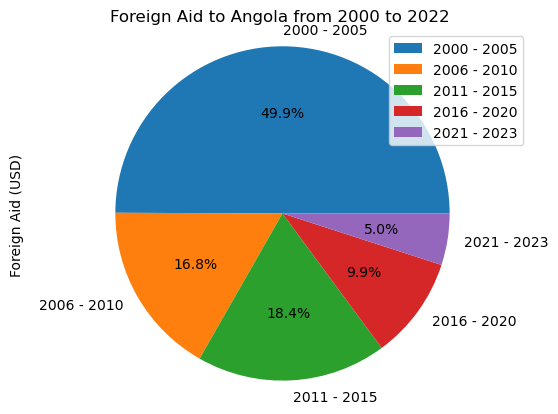

In [40]:
# Make a variable called country and store a 'country_name' in it
country = "Angola"

# Collect all the aid values of the country above
just_one_country = sum_aid.loc[country]

# Create a pie chart based upon the total aid value of that single country
country_pie = just_one_country.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to " + country + " from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Foreign Aid (USD)")

plt.axis("equal")
plt.show()

In [41]:
total_aid = WB_aid_df.groupby("Year Group")["Foreign Aid (USD)"].sum()
total_aid

Year Group
2000 - 2005    3.678964e+11
2006 - 2010    4.986462e+11
2011 - 2015    5.386994e+11
2016 - 2020    5.849776e+11
2021 - 2023    2.786040e+11
Name: Foreign Aid (USD), dtype: float64

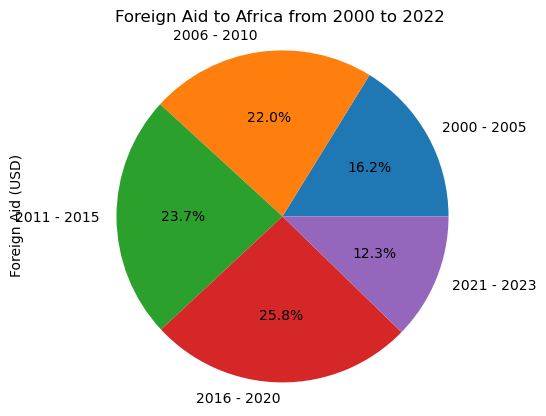

In [42]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
aid_pie = total_aid.plot(kind="pie", y='Foreign Aid (USD)', title=("Foreign Aid to Africa from 2000 to 2022 "), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("Foreign Aid (USD)")

plt.axis("equal")
plt.show()

In [43]:
# Split up our data into groups based upon 'country_name' and 'Year Group'
WB_aid_country_groups = WB_aid_df.groupby(['Year Group','country_name'])
WB_aid_country_groups.head()

,series_id,country_code,country_name,year,Foreign Aid (USD),Year Group
21696,DC.DAC.DEUL.CD,DJI,Djibouti,2007,2.800000e+05,2006 - 2010
142186,DC.DAC.AUSL.CD,AGO,Angola,2000,9.000000e+05,2000 - 2005
142208,DC.DAC.AUSL.CD,EGY,"Egypt, Arab Rep.",2000,8.430000e+06,2000 - 2005
142211,DC.DAC.AUSL.CD,ETH,Ethiopia,2000,1.920000e+06,2000 - 2005
142232,DC.DAC.AUSL.CD,KEN,Kenya,2000,1.210000e+06,2000 - 2005
...,...,...,...,...,...,...
1239984,DC.DAC.SVNL.CD,AGO,Angola,2021,1.010000e+06,2021 - 2023
1540273,DC.DAC.FRAL.CD,GAB,Gabon,2021,5.340000e+07,2021 - 2023
1540305,DC.DAC.FRAL.CD,LBR,Liberia,2021,6.340000e+06,2021 - 2023
1540327,DC.DAC.FRAL.CD,MRT,Mauritania,2021,-1.124000e+07,2021 - 2023


In [44]:
# Create a new variable that holds the sum of our groups
sum_country_up = WB_aid_country_groups[['Foreign Aid (USD)']].sum()
sum_country_up

Foreign Aid (USD)
Year Group  country_name                               
2000 - 2005 Angola                         1.263923e+10
            Botswana                       9.264500e+08
            Burkina Faso                   1.106256e+10
            Central African Republic       1.827140e+09
            Chad                           5.446560e+09
...                                                 ...
2021 - 2023 Togo                           2.276800e+09
            Tunisia                        9.165500e+09
            Uganda                         1.498224e+10
            Zambia                         8.706660e+09
            Zimbabwe                       5.880880e+09

[155 rows x 1 columns]

In [45]:
country_aid = sum_country_up.groupby("country_name")["Foreign Aid (USD)"].sum()
country_aid

country_name
Angola                      2.531090e+10
Botswana                    1.043736e+10
Burkina Faso                7.217095e+10
Central African Republic    2.670185e+10
Chad                        3.852885e+10
Djibouti                    1.037578e+10
Egypt, Arab Rep.            1.421249e+11
Ethiopia                    2.356996e+11
Gabon                       6.272790e+09
Ghana                       9.354143e+10
Kenya                       1.478779e+11
Lesotho                     1.098769e+10
Liberia                     4.297603e+10
Madagascar                  5.070068e+10
Malawi                      7.126816e+10
Mauritania                  2.370442e+10
Mozambique                  1.470478e+11
Nigeria                     2.051604e+11
Rwanda                      6.629324e+10
Samoa                       6.678100e+09
Sao Tome and Principe       3.571580e+09
Senegal                     7.471741e+10
Sierra Leone                3.868017e+10
Somalia                     8.420974e+10
Sud

In [46]:
sum_country_up2 = sum_country_up.reset_index()

In [47]:
africa_aid_pivot = sum_country_up2.pivot(index='country_name', columns='Year Group', values='Foreign Aid (USD)')
africa_aid_pivot

Year Group,2000 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,2021 - 2023
country_name,,,,,
Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09
Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08
Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09
Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09
Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09
Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08
"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10
Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10
Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08


In [48]:
africa_aid_pivot2 = pd.concat([africa_aid_pivot, country_aid], axis=1)
africa_aid_pivot2

,2000 - 2005,2006 - 2010,2011 - 2015,2016 - 2020,2021 - 2023,Foreign Aid (USD)
country_name,,,,,,
Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09,2.531090e+10
Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08,1.043736e+10
Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09,7.217095e+10
Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09,2.670185e+10
Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09,3.852885e+10
Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08,1.037578e+10
"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10,1.421249e+11
Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10,2.356996e+11
Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08,6.272790e+09


In [49]:
africa_aid_pivot2 = africa_aid_pivot2.rename(columns = {'2000 - 2005': 'Aid 2000 - 2005', '2006 - 2010': 'Aid 2006 - 2010','2011 - 2015': 'Aid 2011 - 2015', '2016 - 2020': 'Aid 2016 - 2020', '2021 - 2023': 'Aid 2021 - 2022', 'Foreign Aid (USD)': 'Total Foreign Aid (USD)'})
africa_aid_pivot2

,Aid 2000 - 2005,Aid 2006 - 2010,Aid 2011 - 2015,Aid 2016 - 2020,Aid 2021 - 2022,Total Foreign Aid (USD)
country_name,,,,,,
Angola,1.263923e+10,4.254470e+09,4.649300e+09,2.505720e+09,1.262180e+09,2.531090e+10
Botswana,9.264500e+08,5.390210e+09,1.843480e+09,1.622260e+09,6.549600e+08,1.043736e+10
Burkina Faso,1.106256e+10,1.507039e+10,1.744345e+10,1.916816e+10,9.426390e+09,7.217095e+10
Central African Republic,1.827140e+09,3.634920e+09,6.272390e+09,1.066238e+10,4.305020e+09,2.670185e+10
Chad,5.446560e+09,8.110950e+09,8.499270e+09,1.195346e+10,4.518610e+09,3.852885e+10
Djibouti,1.540280e+09,2.232330e+09,2.619970e+09,3.191780e+09,7.914200e+08,1.037578e+10
"Egypt, Arab Rep.",3.163293e+10,1.988860e+10,3.232078e+10,2.355072e+10,3.473186e+10,1.421249e+11
Ethiopia,3.083171e+10,4.642122e+10,5.658849e+10,7.260455e+10,2.925360e+10,2.356996e+11
Gabon,7.052600e+08,1.242440e+09,1.694340e+09,1.735480e+09,8.952700e+08,6.272790e+09


In [50]:
poverty_search

['SH.UHC.NOP2.TO',
 'SH.UHC.NOP2.ZS',
 'SH.UHC.NOP1.ZS',
 'SH.UHC.NOP1.ZG',
 'SH.UHC.NOP1.CG',
 'SH.UHC.NOP2.CG',
 'SH.UHC.NOP1.TO',
 'SH.UHC.NOP2.ZG',
 'SI.POV.MDIM.17.XQ',
 'SI.POV.MDIM.MA',
 'SI.POV.MDIM.XQ',
 'SI.POV.MDIM.FE',
 'SI.POV.MDIM.HH',
 'SI.POV.MDIM',
 'SI.POV.MDIM.17',
 'SI.POV.NAHC',
 'SI.POV.MDIM.IT']

In [51]:
poverty_search2 = WB_metadata_df[WB_metadata_df['series_id'].isin(poverty_search)]

In [52]:
poverty_search2

,series_id,name,description
19,SH.UHC.NOP2.TO,Number of people pushed below the $3.65 ($ 201...,Number of people pushed below the $3.65 ($ 201...
103,SH.UHC.NOP2.ZS,Proportion of population pushed below the $3.6...,This indicator shows the fraction of a country...
143,SH.UHC.NOP1.ZS,Proportion of population pushed below the $2.1...,This indicator shows the fraction of a country...
527,SH.UHC.NOP1.ZG,Increase in poverty gap at $1.90 ($ 2011 PPP) ...,Increase in poverty gap at $1.90 ($ 2011 PPP) ...
528,SH.UHC.NOP1.CG,Increase in poverty gap at $1.90 ($ 2011 PPP) ...,Increase in poverty gap at $1.90 ($ 2011 PPP) ...
529,SH.UHC.NOP2.CG,Increase in poverty gap at $3.20 ($ 2011 PPP) ...,Increase in poverty gap at $3.20 ($ 2011 PPP) ...
546,SH.UHC.NOP1.TO,Number of people pushed below the $2.15 ($ 201...,Number of people pushed below the $2.15 ($ 201...
926,SH.UHC.NOP2.ZG,Increase in poverty gap at $3.20 ($ 2011 PPP) ...,Increase in poverty gap at $3.20 ($ 2011 PPP) ...
1271,SI.POV.MDIM.17.XQ,"Multidimensional poverty index, children (popu...",Proportion of the child population that is mul...
1305,SI.POV.MDIM.MA,"Multidimensional poverty headcount ratio, male...",The percentage of male population who are mult...


In [53]:
WB_poverty_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SI.POV.MDIM.XQ"]
WB_poverty_df


,series_id,country_code,country_name,year,value,Year Group
2106322,SI.POV.MDIM.XQ,UGA,Uganda,2016,0.250,2016 - 2020
2106346,SI.POV.MDIM.XQ,UGA,Uganda,2019,0.230,2016 - 2020
2106355,SI.POV.MDIM.XQ,NGA,Nigeria,2021,0.257,2021 - 2023
7236615,SI.POV.MDIM.XQ,GHA,Ghana,2010,0.179,2006 - 2010
7236618,SI.POV.MDIM.XQ,RWA,Rwanda,2010,0.240,2006 - 2010
7236622,SI.POV.MDIM.XQ,GHA,Ghana,2011,0.298,2011 - 2015
7236634,SI.POV.MDIM.XQ,RWA,Rwanda,2013,0.170,2011 - 2015
7236641,SI.POV.MDIM.XQ,MOZ,Mozambique,2014,0.310,2011 - 2015
7236646,SI.POV.MDIM.XQ,AGO,Angola,2015,0.264,2011 - 2015
7236655,SI.POV.MDIM.XQ,GHA,Ghana,2016,0.236,2016 - 2020


In [54]:
WB_poverty_country_groups = WB_poverty_df.groupby(['Year Group','country_name'])
WB_poverty_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group
2106322,SI.POV.MDIM.XQ,UGA,Uganda,2016,0.250,2016 - 2020
2106346,SI.POV.MDIM.XQ,UGA,Uganda,2019,0.230,2016 - 2020
2106355,SI.POV.MDIM.XQ,NGA,Nigeria,2021,0.257,2021 - 2023
7236615,SI.POV.MDIM.XQ,GHA,Ghana,2010,0.179,2006 - 2010
7236618,SI.POV.MDIM.XQ,RWA,Rwanda,2010,0.240,2006 - 2010
7236622,SI.POV.MDIM.XQ,GHA,Ghana,2011,0.298,2011 - 2015
7236634,SI.POV.MDIM.XQ,RWA,Rwanda,2013,0.170,2011 - 2015
7236641,SI.POV.MDIM.XQ,MOZ,Mozambique,2014,0.310,2011 - 2015
7236646,SI.POV.MDIM.XQ,AGO,Angola,2015,0.264,2011 - 2015
7236655,SI.POV.MDIM.XQ,GHA,Ghana,2016,0.236,2016 - 2020


In [55]:
WB_africadata_2000_df2['series_id'].unique().values_count()

AttributeError: 'numpy.ndarray' object has no attribute 'values_count'

In [ ]:
# Set x axis and tick locations
x_axis = np.arange(len(WB_aid_ls2))
tick_locations = [value for value in x_axis]

In [ ]:
WB_aid_grouped_df = WB_aid_2000_df2.groupby("Year Group")

In [ ]:
# Find how many rows fall into each bin
print(WB_aid_grouped_df["Year Group"].count())

In [ ]:
unique_values, counts = np.unique(WB_africadata_2000_df2['series_id'], return_counts=True)

# Print the unique values and their counts
print("Unique values:", unique_values)
print("Counts:", counts)

In [56]:
Poverty_search = key_word(WB_metadata_df, 'name', 'Poverty', 'series_id')

In [57]:
Poverty_search

['SI.POV.UMIC.GP',
 'SI.POV.DDAY',
 'SI.POV.LMIC.GP',
 'SI.POV.LMIC',
 'SI.POV.UMIC',
 'SI.POV.NAHC',
 'SI.POV.GAPS']

In [58]:
 Poverty_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(Poverty_search)]

In [59]:
Poverty_search2

,series_id,name,description
85,SI.POV.UMIC.GP,Poverty gap at $6.85 a day (2017 PPP) (%),Poverty gap at $6.85 a day (2017 PPP) is the m...
148,SI.POV.DDAY,Poverty headcount ratio at $2.15 a day (2017 P...,Poverty headcount ratio at $2.15 a day is the ...
624,SI.POV.LMIC.GP,Poverty gap at $3.65 a day (2017 PPP) (%),Poverty gap at $3.65 a day (2017 PPP) is the m...
1074,SI.POV.LMIC,Poverty headcount ratio at $3.65 a day (2017 P...,Poverty headcount ratio at $3.65 a day is the ...
1169,SI.POV.UMIC,Poverty headcount ratio at $6.85 a day (2017 P...,Poverty headcount ratio at $6.85 a day is the ...
1314,SI.POV.NAHC,Poverty headcount ratio at national poverty li...,National poverty headcount ratio is the percen...
1318,SI.POV.GAPS,Poverty gap at $2.15 a day (2017 PPP) (%),Poverty gap at $2.15 a day (2017 PPP) is the m...


In [64]:
WB_Poverty_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SI.POV.UMIC"]
WB_Poverty_df

,series_id,country_code,country_name,year,value,Year Group
1724791,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
1724831,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
1724837,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
1724840,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
1724845,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
2258039,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
6955681,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
7352561,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
7353001,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [61]:
# Create a new variable that holds the sum of our groups
avg_Poverty = WB_Poverty_df[['value']].mean()
avg_Poverty

value    60.894215
dtype: float64

In [65]:
WB_Pov_country_groups = WB_Poverty_df.groupby(['Year Group','country_name'])
WB_Pov_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group
1724791,SI.POV.UMIC,AGO,Angola,2000,67.2,2000 - 2005
1724831,SI.POV.UMIC,MRT,Mauritania,2000,80.9,2000 - 2005
1724837,SI.POV.UMIC,RWA,Rwanda,2000,96.0,2000 - 2005
1724840,SI.POV.UMIC,STP,Sao Tome and Principe,2000,87.0,2000 - 2005
1724845,SI.POV.UMIC,TUN,Tunisia,2000,51.2,2000 - 2005
...,...,...,...,...,...,...
2258039,SI.POV.UMIC,DJI,Djibouti,2013,80.6,2011 - 2015
6955681,SI.POV.UMIC,CAF,Central African Republic,2003,95.2,2000 - 2005
7352561,SI.POV.UMIC,NGA,Nigeria,2009,92.9,2006 - 2010
7353001,SI.POV.UMIC,TZA,Tanzania,2017,91.8,2016 - 2020


In [66]:
avg_Poverty = WB_Pov_country_groups[['value']].mean()
avg_Poverty

value
Year Group  country_name                   
2000 - 2005 Angola                     67.2
            Botswana                   68.6
            Burkina Faso               93.8
            Central African Republic   95.2
            Chad                       95.9
...                                     ...
2021 - 2023 Togo                       86.8
            Tunisia                    16.2
            Uganda                      NaN
            Zambia                     93.2
            Zimbabwe                    NaN

[155 rows x 1 columns]

In [67]:
avg_Poverty.dropna(how='all')

value
Year Group  country_name                   
2000 - 2005 Angola                     67.2
            Botswana                   68.6
            Burkina Faso               93.8
            Central African Republic   95.2
            Chad                       95.9
...                                     ...
2021 - 2023 Kenya                      91.3
            Senegal                    75.6
            Togo                       86.8
            Tunisia                    16.2
            Zambia                     93.2

[102 rows x 1 columns]

In [68]:
total_Pov = WB_Poverty_df.groupby("Year Group")["value"].mean()
total_Pov

Year Group
2000 - 2005    85.624242
2006 - 2010    83.762500
2011 - 2015    81.557143
2016 - 2020    83.828571
2021 - 2023    79.525000
Name: value, dtype: float64

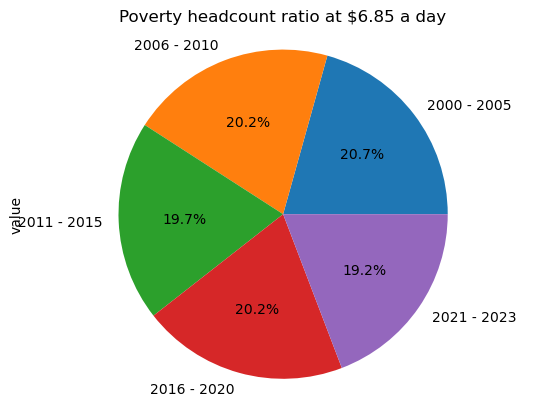

In [69]:
# Create a pie chart based upon the total aid over the period of 2000 to 2022
Pverty_pie = total_Pov.plot(kind="pie", y='value', title=("Poverty headcount ratio at $6.85 a day"), autopct="%1.1f%%")                                                                       
country_pie.set_ylabel("value")

plt.axis("equal")
plt.show()

In [ ]:
sumPOV = totalPov

In [70]:
WB_africadata_2000_df2
country_counts = WB_africadata_2000_df2['country_name'].value_counts()

print("Counts of entries for each country name:")
print(country_counts)

Counts of entries for each country name:
Ghana                       23636
Egypt, Arab Rep.            23602
Senegal                     23478
Tanzania                    23326
Madagascar                  23133
Tunisia                     23069
Burkina Faso                22825
Togo                        22793
Kenya                       22709
Uganda                      22644
Mozambique                  22352
Rwanda                      22281
Malawi                      22053
Botswana                    22013
Lesotho                     21918
Nigeria                     21857
Ethiopia                    21735
Zambia                      21589
Angola                      21552
Sierra Leone                20680
Sudan                       20533
Zimbabwe                    20436
Mauritania                  20087
Gabon                       19102
Liberia                     19072
Chad                        18744
Samoa                       18738
Central African Republic    18315
Djibout

In [71]:
WB_africadata_2000_df2
pov_counts = WB_Poverty_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(pov_counts)

Counts of entries for each country name:
Egypt, Arab Rep.            7
Nigeria                     6
Zambia                      6
Uganda                      6
Senegal                     5
Mauritania                  5
Togo                        5
Burkina Faso                5
Tanzania                    5
Tunisia                     5
Rwanda                      5
Kenya                       4
Djibouti                    4
Malawi                      4
Mozambique                  4
Madagascar                  4
Chad                        4
Liberia                     3
Central African Republic    3
Zimbabwe                    3
Ghana                       3
Angola                      3
Ethiopia                    3
Sierra Leone                3
Samoa                       3
Botswana                    3
Sao Tome and Principe       3
Gabon                       2
Lesotho                     2
Sudan                       2
Somalia                     1
Name: country_name, dtype: in

In [72]:
WB_africadata_2000_df2
aid_counts = WB_aid_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(aid_counts)

Counts of entries for each country name:
Ethiopia                    698
Kenya                       692
Uganda                      688
Egypt, Arab Rep.            678
Sudan                       660
Tanzania                    649
Ghana                       648
Rwanda                      648
Mozambique                  645
Nigeria                     645
Zimbabwe                    639
Malawi                      626
Senegal                     621
Zambia                      611
Somalia                     609
Sierra Leone                605
Tunisia                     599
Angola                      595
Burkina Faso                576
Madagascar                  547
Liberia                     538
Central African Republic    527
Togo                        521
Chad                        518
Mauritania                  489
Lesotho                     455
Botswana                    453
Gabon                       384
Djibouti                    382
Sao Tome and Principe       359

In [75]:
Mortality_search = key_word(WB_metadata_df, 'name', 'Mortality', 'series_id')

In [76]:
Mortality_search

['SH.STA.AIRP.MA.P5',
 'SH.DYN.NCOM.FE.ZS',
 'SP.DYN.AMRT.FE',
 'SH.DYN.MORT.FE',
 'SH.DYN.MORT.MA',
 'SH.STA.WASH.P5',
 'SP.DYN.IMRT.MA.IN',
 'SP.DYN.IMRT.IN',
 'SH.DYN.MORT',
 'SP.DYN.AMRT.MA',
 'SH.STA.TRAF.P5',
 'SH.STA.AIRP.FE.P5',
 'SH.DYN.NMRT',
 'SH.STA.AIRP.P5',
 'SH.STA.POIS.P5.MA',
 'SH.STA.POIS.P5',
 'SH.STA.POIS.P5.FE',
 'SH.DYN.NCOM.MA.ZS',
 'SP.DYN.IMRT.FE.IN',
 'SH.DYN.NCOM.ZS']

In [77]:
Mortality_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(Mortality_search)]

In [78]:
Mortality_search2

,series_id,name,description
35,SH.STA.AIRP.MA.P5,Mortality rate attributed to household and amb...,Mortality rate attributed to household and amb...
100,SH.DYN.NCOM.FE.ZS,"Mortality from CVD, cancer, diabetes or CRD be...","Mortality from CVD, cancer, diabetes or CRD is..."
106,SP.DYN.AMRT.FE,"Mortality rate, adult, female (per 1,000 femal...","Adult mortality rate, female, is the probabili..."
186,SH.DYN.MORT.FE,"Mortality rate, under-5, female (per 1,000 liv...","Under-five mortality rate, female is the proba..."
239,SH.DYN.MORT.MA,"Mortality rate, under-5, male (per 1,000 live ...","Under-five mortality rate, male is the probabi..."
281,SH.STA.WASH.P5,"Mortality rate attributed to unsafe water, uns...","Mortality rate attributed to unsafe water, uns..."
297,SP.DYN.IMRT.MA.IN,"Mortality rate, infant, male (per 1,000 live b...","Infant mortality rate, male is the number of m..."
354,SP.DYN.IMRT.IN,"Mortality rate, infant (per 1,000 live births)",Infant mortality rate is the number of infants...
356,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000 live births)",Under-five mortality rate is the probability p...
481,SP.DYN.AMRT.MA,"Mortality rate, adult, male (per 1,000 male ad...","Adult mortality rate, male, is the probability..."


In [79]:
WB_Mortality_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'] == "SH.STA.WASH.P5"]
WB_Mortality_df

,series_id,country_code,country_name,year,value,Year Group
2054875,SH.STA.WASH.P5,BFA,Burkina Faso,2016,49.6,2016 - 2020
2054888,SH.STA.WASH.P5,BWA,Botswana,2016,11.8,2016 - 2020
2054889,SH.STA.WASH.P5,CAF,Central African Republic,2016,82.1,2016 - 2020
2054908,SH.STA.WASH.P5,DJI,Djibouti,2016,31.3,2016 - 2020
2054918,SH.STA.WASH.P5,EGY,"Egypt, Arab Rep.",2016,2.0,2016 - 2020
...,...,...,...,...,...,...
8085687,SH.STA.WASH.P5,TZA,Tanzania,2019,30.2,2016 - 2020
8085688,SH.STA.WASH.P5,UGA,Uganda,2019,28.1,2016 - 2020
8085699,SH.STA.WASH.P5,WSM,Samoa,2019,8.2,2016 - 2020
8085703,SH.STA.WASH.P5,ZMB,Zambia,2019,35.8,2016 - 2020


In [80]:
Mortality_counts = WB_Mortality_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(Mortality_counts)

Counts of entries for each country name:
Burkina Faso                2
Sudan                       2
Angola                      2
Zimbabwe                    2
Zambia                      2
Samoa                       2
Uganda                      2
Tanzania                    2
Tunisia                     2
Togo                        2
Chad                        2
Sao Tome and Principe       2
Somalia                     2
Sierra Leone                2
Senegal                     2
Nigeria                     2
Botswana                    2
Malawi                      2
Mauritania                  2
Mozambique                  2
Madagascar                  2
Lesotho                     2
Liberia                     2
Kenya                       2
Ghana                       2
Gabon                       2
Ethiopia                    2
Egypt, Arab Rep.            2
Djibouti                    2
Central African Republic    2
Rwanda                      2
Name: country_name, dtype: in

In [81]:
education_search

['SE.SEC.TCAQ.UP.ZS',
 'SL.TLF.INTM.ZS',
 'SL.TLF.BASC.ZS',
 'NY.ADJ.AEDU.CD',
 'SL.UEM.BASC.ZS',
 'SE.PRE.TCAQ.ZS',
 'SL.TLF.ADVN.ZS',
 'SE.XPD.CSEC.ZS',
 'SE.XPD.CTER.ZS',
 'SE.XPD.CTOT.ZS',
 'SE.XPD.PRIM.ZS',
 'SE.XPD.CPRM.ZS',
 'SE.XPD.SECO.ZS',
 'NY.ADJ.AEDU.GN.ZS',
 'FX.OWN.TOTL.PL.ZS',
 'SE.SEC.TCAQ.ZS',
 'SE.SEC.TCAQ.LO.ZS',
 'SE.PRM.TCAQ.ZS',
 'SE.XPD.TERT.ZS',
 'SL.UEM.ADVN.ZS',
 'FX.OWN.TOTL.SO.ZS',
 'SL.UEM.INTM.ZS']

In [82]:
education_search2= WB_metadata_df[WB_metadata_df['series_id'].isin(education_search)]

In [83]:
education_search2

,series_id,name,description
70,SE.SEC.TCAQ.UP.ZS,Trained teachers in upper secondary education ...,Trained teachers in upper secondary education ...
88,SL.TLF.INTM.ZS,Labor force with intermediate education (% of ...,The ratio of the labor force with intermediate...
202,SL.TLF.BASC.ZS,Labor force with basic education (% of total w...,The ratio of the labor force with basic educat...
211,NY.ADJ.AEDU.CD,Adjusted savings: education expenditure (curre...,Education expenditure refers to the current op...
263,SL.UEM.BASC.ZS,Unemployment with basic education (% of total ...,The percentage of the labor force with a basic...
300,SE.PRE.TCAQ.ZS,Trained teachers in preprimary education (% of...,Trained teachers in preprimary education are t...
342,SL.TLF.ADVN.ZS,Labor force with advanced education (% of tota...,The ratio of the labor force with advanced edu...
584,SE.XPD.CSEC.ZS,"Current education expenditure, secondary (% of...",Current expenditure is expressed as a percenta...
611,SE.XPD.CTER.ZS,"Current education expenditure, tertiary (% of ...",Current expenditure is expressed as a percenta...
621,SE.XPD.CTOT.ZS,"Current education expenditure, total (% of tot...",Current expenditure is expressed as a percenta...


In [84]:
WB_education_df = WB_africadata_2000_df2.loc[WB_africadata_2000_df2['series_id'].isin(["SE.SEC.CUAT.LO.ZS", "SE.SEC.CUAT.UP.ZS", "SE.TER.CUAT.MS.ZS" ])]
WB_education_df

,series_id,country_code,country_name,year,value,Year Group
858486,SE.SEC.CUAT.UP.ZS,WSM,Samoa,2001,63.037628,2000 - 2005
858513,SE.SEC.CUAT.UP.ZS,TZA,Tanzania,2002,1.622880,2000 - 2005
858514,SE.SEC.CUAT.UP.ZS,UGA,Uganda,2002,6.453940,2000 - 2005
858518,SE.SEC.CUAT.UP.ZS,ZWE,Zimbabwe,2002,10.357510,2000 - 2005
858528,SE.SEC.CUAT.UP.ZS,SLE,Sierra Leone,2003,4.066010,2000 - 2005
...,...,...,...,...,...,...
4637299,SE.SEC.CUAT.LO.ZS,NGA,Nigeria,2022,69.982292,2021 - 2023
4637313,SE.SEC.CUAT.LO.ZS,RWA,Rwanda,2022,17.950159,2021 - 2023
4637317,SE.SEC.CUAT.LO.ZS,SOM,Somalia,2022,11.111570,2021 - 2023
4637331,SE.SEC.CUAT.LO.ZS,ZMB,Zambia,2022,65.410141,2021 - 2023


In [85]:
education_counts = WB_education_df['country_name'].value_counts()

print("Counts of entries for each country name:")
print(education_counts)

Counts of entries for each country name:
Rwanda                      28
Senegal                     23
Angola                      20
Tanzania                    18
Zambia                      18
Uganda                      17
Zimbabwe                    17
Nigeria                     16
Sierra Leone                15
Burkina Faso                15
Ghana                       15
Mauritania                  14
Togo                        14
Kenya                       14
Malawi                      14
Mozambique                  13
Liberia                     12
Botswana                    12
Ethiopia                    11
Egypt, Arab Rep.            11
Tunisia                     10
Chad                         9
Lesotho                      8
Madagascar                   8
Samoa                        4
Djibouti                     3
Sao Tome and Principe        3
Sudan                        3
Central African Republic     2
Somalia                      2
Name: country_name, dtype: in

In [86]:
WB_education_country_groups = WB_education_df.groupby(['Year Group','country_name'])
WB_education_country_groups.head()

,series_id,country_code,country_name,year,value,Year Group
858486,SE.SEC.CUAT.UP.ZS,WSM,Samoa,2001,63.037628,2000 - 2005
858513,SE.SEC.CUAT.UP.ZS,TZA,Tanzania,2002,1.622880,2000 - 2005
858514,SE.SEC.CUAT.UP.ZS,UGA,Uganda,2002,6.453940,2000 - 2005
858518,SE.SEC.CUAT.UP.ZS,ZWE,Zimbabwe,2002,10.357510,2000 - 2005
858528,SE.SEC.CUAT.UP.ZS,SLE,Sierra Leone,2003,4.066010,2000 - 2005
...,...,...,...,...,...,...
4637241,SE.SEC.CUAT.LO.ZS,ZMB,Zambia,2021,63.898285,2021 - 2023
4637242,SE.SEC.CUAT.LO.ZS,ZWE,Zimbabwe,2021,89.623985,2021 - 2023
4637285,SE.SEC.CUAT.LO.ZS,KEN,Kenya,2022,64.952110,2021 - 2023
4637299,SE.SEC.CUAT.LO.ZS,NGA,Nigeria,2022,69.982292,2021 - 2023


In [87]:
avg_education = WB_education_country_groups[['value']].mean()
avg_education

value
Year Group  country_name                       
2000 - 2005 Angola                     9.711959
            Botswana                        NaN
            Burkina Faso                    NaN
            Central African Republic        NaN
            Chad                       5.519980
...                                         ...
2021 - 2023 Togo                            NaN
            Tunisia                         NaN
            Uganda                    26.071760
            Zambia                    34.146674
            Zimbabwe                  51.378370

[150 rows x 1 columns]

In [ ]:
avg_education['value']

In [91]:
result = WB_education_df[WB_education_df['country_name'].str.contains('Senegal')]
result

,series_id,country_code,country_name,year,value,Year Group
858692,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2006,4.925110,2006 - 2010
859088,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2011,5.616410,2011 - 2015
859257,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2013,8.234610,2011 - 2015
859460,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2015,5.711980,2011 - 2015
859557,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2016,6.906670,2016 - 2020
859668,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2017,10.862950,2016 - 2020
859769,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2018,7.199610,2016 - 2020
859885,SE.SEC.CUAT.UP.ZS,SEN,Senegal,2019,7.410920,2016 - 2020
1018141,SE.TER.CUAT.MS.ZS,SEN,Senegal,2011,1.158080,2011 - 2015
1018273,SE.TER.CUAT.MS.ZS,SEN,Senegal,2013,1.935800,2011 - 2015
